In [208]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import exploration_modules as expo
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)
importlib.reload(expo)

<module 'exploration_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\exploration_modules.py'>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
# set configuration
sample_size, nr_sample_sets, nr_moments = 100, 30, 10
n_folds = 5
test_size = 0.2

## Bounded distributions

In [140]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample_sets, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [141]:
moments_df = dem.get_moments(bounded_samples, nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,label
0,0.320220,0.057638,0.008811,0.008488,0.003066,0.001929,0.000933,0.000532,0.000284,0.000160,beta_1_2
1,0.320307,0.053861,0.005825,0.005708,0.001405,0.000855,0.000301,0.000155,0.000064,0.000031,beta_1_2
2,0.310869,0.045293,0.008445,0.006562,0.002707,0.001653,0.000894,0.000538,0.000319,0.000196,beta_1_2


In [224]:
x = moments_df.loc[0:2]
y = x.iloc[:,:-1]
y
np.cov(y)

array([[0.50982647, 0.10441435, 0.43102133],
       [0.10441435, 0.06050687, 0.1022105 ],
       [0.43102133, 0.1022105 , 0.37129135]])

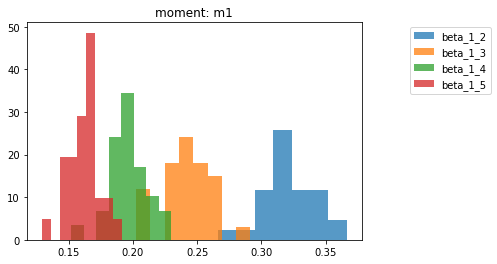

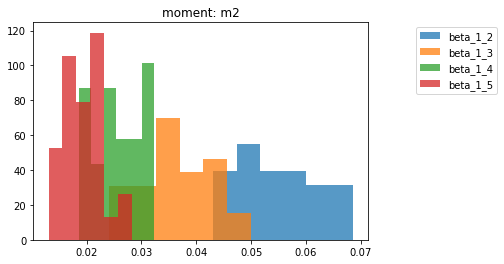

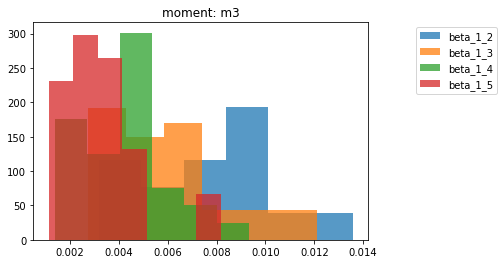

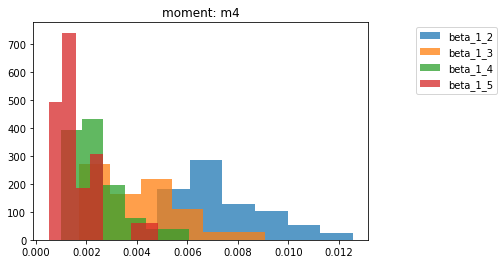

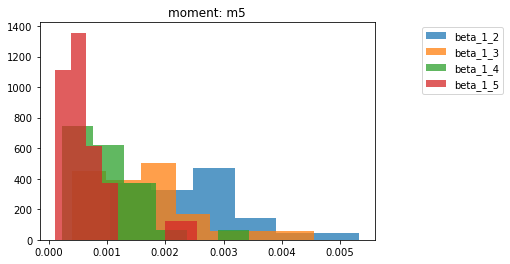

In [68]:
dem.get_histogram_of_moments(moments_df)

### SVM

In [197]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
nr_moments_list = np.arange(2,21)

#### version 1

In [207]:
res_svm = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, n_folds, test_size, 1)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

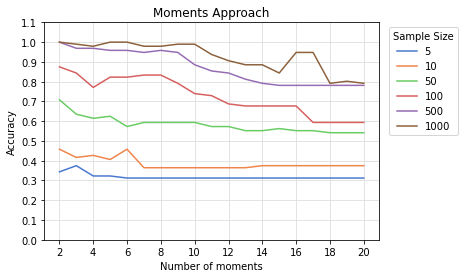

In [79]:
cm.plot_cv_moments(res_svm)

In [196]:
res_svm

,score,cost,gamma,nr_moments,sample_size
0,0.343750,1.0,1.00,2,5
1,0.375000,1.0,0.25,3,5
2,0.322917,1.0,1.00,4,5
3,0.322917,1.0,1.00,5,5
4,0.312500,1.0,1.00,6,5
...,...,...,...,...,...
109,0.947917,5.0,0.25,16,1000
110,0.947917,5.0,0.25,17,1000
111,0.791667,1.0,1.00,18,1000
112,0.802083,1.0,1.00,19,1000


#### version 2

In [166]:
cost = [0.01, 0.25, 1, 5, 10]
gamma = [0.01, 0.25, 1, 5, 10]

In [167]:
res_svm_v2 = cm.cv_samplesize_moments_svm(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, n_folds, test_size, cost, gamma)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

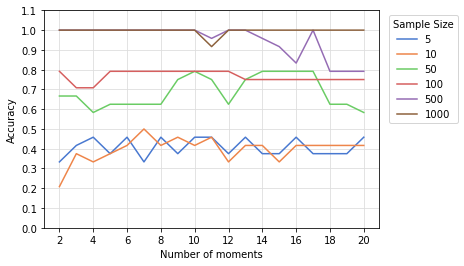

In [168]:
cm.plot_cv_moments_v2(res_svm_v2)

In [97]:
res_svm.to_csv('results/moments/res_svm_bounded.csv')
res_svm_v2.to_csv('results/moments/res_svm_bounded_v2.csv')

### Logistic Regression

#### version 1

In [184]:
res_lr = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, n_folds, test_size, 2)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

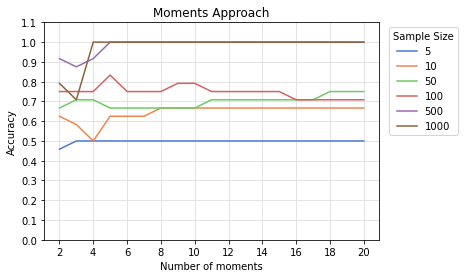

In [186]:
cm.plot_cv_moments(res_lr)

#### version 2

In [169]:
C = [0.01, 0.25, 1, 5, 10]

In [175]:
res_lr_v2 = cm.cv_samplesize_moments_lr(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, n_folds, test_size, C)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

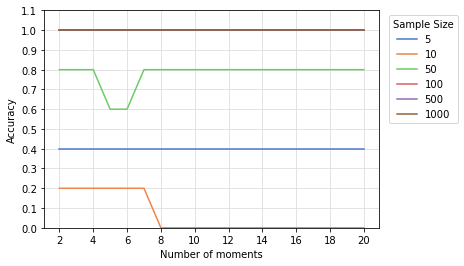

In [177]:
cm.plot_cv_moments_v2(res_lr_v2)

In [41]:
res_lr.to_csv('results/moments/res_lr_bounded.csv')

## Heavytail distributions

In [204]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples_t = dm.get_samples(heavytail_dists, nr_sample_sets, sample_size, transform = True)
#dm.plot_histograms_of_samples(heavytail_samples)

In [205]:
nr_moments=4
moments_df = dem.get_moments(heavytail_samples_t, nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,label
0,0.856877,0.552635,0.748622,2.125040,cauchy
1,0.751252,0.339962,0.267032,0.698255,cauchy
2,0.961129,0.651867,0.673340,1.947710,cauchy


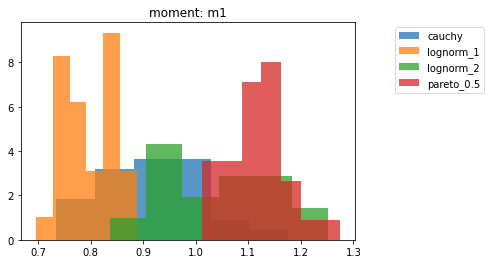

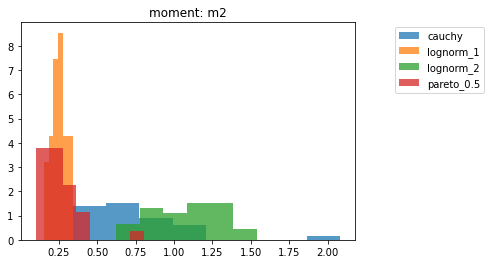

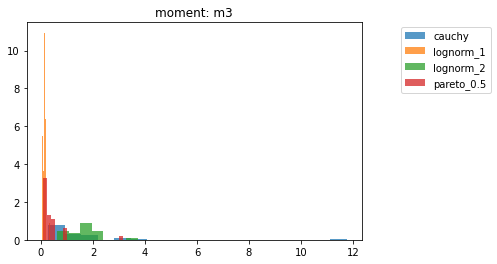

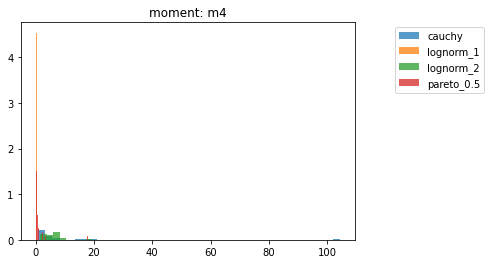

In [206]:
dem.get_histogram_of_moments(moments_df)

### SVM

In [192]:
res_svm_ht = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, heavytail_dists, nr_sample_sets, n_folds, test_size, 1, transform = True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

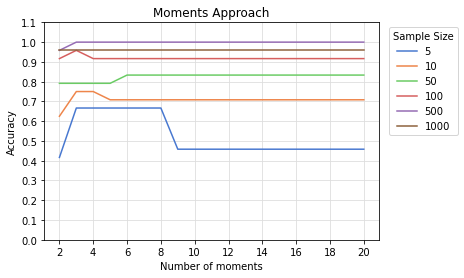

In [193]:
cm.plot_cv_moments(res_svm_ht)

### Logistic Regression

In [194]:
res_lr_ht = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, heavytail_dists, nr_sample_sets, n_folds, test_size, 2, transform=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

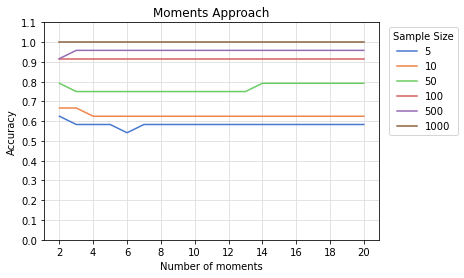

In [195]:
cm.plot_cv_moments(res_lr_ht)

In [45]:
res_svm_ht.to_csv('results/moments/res_svm_heavytail.csv')
res_lr_ht.to_csv('results/moments/res_lr_heavytail.csv')